In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import a scoring metric to compare methods
from sklearn.metrics import r2_score
%matplotlib inline
# the data path

In [3]:
remote_path = "https://raw.githubusercontent.com/drnesr/WaterConsumption/master/data/SampleData.csv"

df=pd.read_csv(remote_path)
df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [5]:
# Converting the column to DateTime format
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


In [6]:
df = df.assign(missing= np.nan)
df.missing[df.target.isna()] = df.reference
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   reference  96 non-null     float64
 1   target     75 non-null     float64
 2   missing    21 non-null     float64
dtypes: float64(3)
memory usage: 3.0 KB


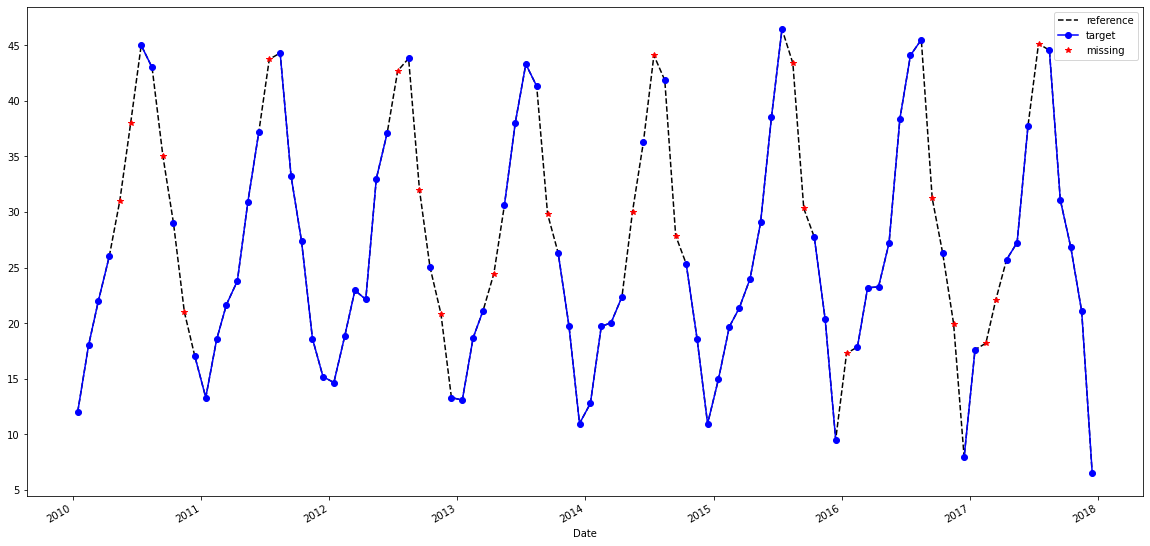

In [7]:
df.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

In [8]:
# Filling using mean or median
# Creating a column in the dataframe
# instead of : df['NewCol']=0, we use
# df = df.assign(NewCol=default_value)
# to avoid pandas warning.
df = df.assign(FillMean=df.target.fillna(df.target.mean()))
df = df.assign(FillMedian=df.target.fillna(df.target.median()))

In [9]:
# imputing using the rolling average
df = df.assign(RollingMean=df.target.fillna(df.target.rolling(24,min_periods=1,).mean()))
# imputing using the rolling median
df = df.assign(RollingMedian=df.target.fillna(df.target.rolling(24,min_periods=1,).median()))# imputing using the median

In [10]:
df = df.assign(InterpolateLinear=df.target.interpolate(method='linear'))
df = df.assign(InterpolateTime=df.target.interpolate(method='time'))
df = df.assign(InterpolateQuadratic=df.target.interpolate(method='quadratic'))
df = df.assign(InterpolateCubic=df.target.interpolate(method='cubic'))
df = df.assign(InterpolateSLinear=df.target.interpolate(method='slinear'))
df = df.assign(InterpolateAkima=df.target.interpolate(method='akima'))
df = df.assign(InterpolatePoly5=df.target.interpolate(method='polynomial', order=5)) 
df = df.assign(InterpolatePoly7=df.target.interpolate(method='polynomial', order=7))
df = df.assign(InterpolateSpline3=df.target.interpolate(method='spline', order=3))
df = df.assign(InterpolateSpline4=df.target.interpolate(method='spline', order=4))
df = df.assign(InterpolateSpline5=df.target.interpolate(method='spline', order=5))

In [11]:
results = [(method, r2_score(df.reference, df[method])) for method in list(df)[3:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

,Method,R_squared
9,InterpolateAkima,0.981684100149588
5,InterpolateTime,0.9815664478940275
8,InterpolateSLinear,0.9815664478940275
4,InterpolateLinear,0.9813215759943529
6,InterpolateQuadratic,0.9663474396797
12,InterpolateSpline3,0.9633836918698976
7,InterpolateCubic,0.9633218181089737
10,InterpolatePoly5,0.954157955951024
14,InterpolateSpline5,0.951671359314308
11,InterpolatePoly7,0.9504371542313383


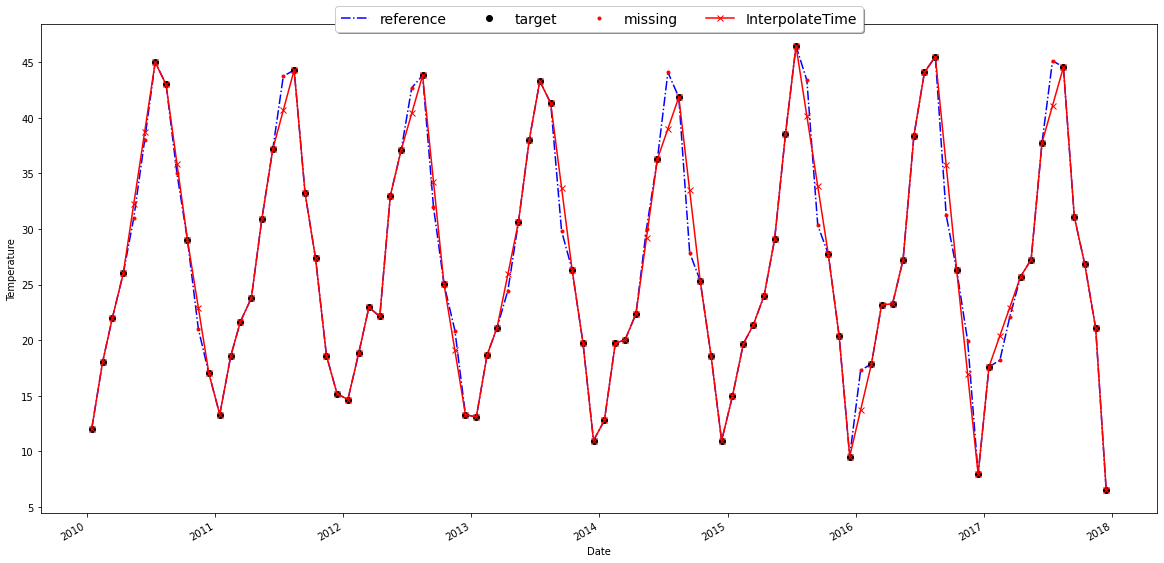

In [12]:
final_df= df[['reference', 'target', 'missing', 'InterpolateTime' ]]
final_df.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(20,10));
plt.ylabel('Temperature');
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5, prop={'size': 14} );